In [2]:
import tensorflow
from tensorflow import keras
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [4]:
batch_size = 128
num_class = 10
epochs = 20

In [188]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [154]:
len(x_train)

60000

In [155]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

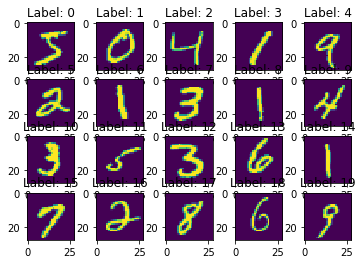

In [156]:
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.title("Label: "+str(i))
    plt.imshow(x_train[i].reshape(28, 28), cmap=None)

In [157]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [189]:
x_train, x_test = x_train / 255, x_test / 255

In [159]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [198]:
model = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10),
    keras.layers.Activation("softmax")
])

In [200]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [201]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
60000/60000 [==============================] - 8s 136us/sample - loss: 0.2186 - accuracy: 0.9357


In [202]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 87us/sample - loss: 0.1110 - accuracy: 0.9673


[0.11100987394060939, 0.9673]

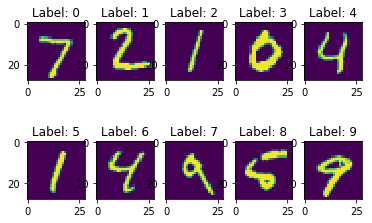

In [164]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title("Label: " + str(i))
    plt.imshow(x_test[i].reshape(28, 28))

In [165]:
model.predict(x_test[0:10])

array([[2.09502929e-07, 2.01637214e-08, 4.99830412e-06, 9.49767942e-04,
        2.29349688e-13, 1.84017165e-06, 4.40638758e-12, 9.99037743e-01,
        3.99309066e-08, 5.28526607e-06],
       [1.59141926e-08, 1.48377922e-06, 9.99998331e-01, 1.42152174e-07,
        2.96394002e-15, 5.18554422e-10, 5.31336131e-09, 2.76362329e-15,
        9.19852550e-09, 9.04823972e-15],
       [7.93935306e-10, 9.99983311e-01, 3.59339288e-06, 4.98804695e-08,
        4.43392719e-06, 1.01474924e-07, 1.24284156e-07, 6.45422506e-06,
        1.85438671e-06, 1.36510503e-09],
       [9.99957919e-01, 1.23638069e-08, 1.65754882e-05, 1.94859510e-07,
        5.44648401e-07, 6.50844777e-06, 9.64421361e-06, 2.59726471e-06,
        7.81312295e-08, 5.93851155e-06],
       [2.18918643e-07, 1.63066213e-10, 1.59837924e-07, 2.10758182e-11,
        9.96170223e-01, 2.58022270e-09, 5.07817752e-08, 2.96914845e-06,
        3.54872998e-09, 3.82638793e-03],
       [1.22893648e-11, 9.99993324e-01, 4.77903983e-09, 8.38011605e-10,
   

In [166]:
import numpy as np

In [167]:
max_arg = []
for i in range(10):
    max_arg.append(np.argmax(model.predict(x_test[0:10])[i]))
print(max_arg)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]


## 課題

fashion_mnist = keras.datasets.fashion_mnist

でデータをダウンロードして学習させて制度が90%以上になるようにしよう。

In [294]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [211]:
len(x_train)

60000

In [212]:
len(y_train)

60000

In [213]:
len(x_test)

10000

In [214]:
len(y_test)

10000

In [227]:
x_train, x_test = x_train / 255, x_test / 255

In [228]:
model = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax")
])

In [229]:
model.compile(optimizer="adagrad", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
# model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [230]:
model.fit(x_train, y_train, batch_size=256, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.7442 - accuracy: 0.7585
Epoch 2/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.5678 - accuracy: 0.8142
Epoch 3/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.5280 - accuracy: 0.8243
Epoch 4/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.5065 - accuracy: 0.8312
Epoch 5/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.4905 - accuracy: 0.8351


In [231]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 83us/sample - loss: 0.4949 - accuracy: 0.8322


[0.49493607330322265, 0.8322]

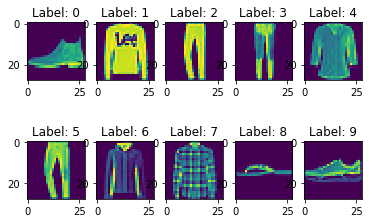

In [185]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.title("Label: "+str(i))
    plt.imshow(x_test[i].reshape(28, 28))

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [6]:
keras.backend.image_data_format()

'channels_last'

In [7]:
print(x_train.shape)

(60000, 28, 28)


In [8]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [9]:
x_train, x_test = x_train / 255, x_test / 255

In [11]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3),
                                        activation='relu',
                                        input_shape=(28, 28, 1)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_class, activation='softmax')
])

In [12]:
model.compile(optimizer="adagrad", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [14]:
model.fit(x_train, y_train, batch_size=256, epochs=1)

60000/60000 [==============================] - 116s 2ms/sample - loss: 0.6231 - acc: 0.7786


In [15]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 7s 720us/sample - loss: 0.5222 - acc: 0.8028


[0.5222484354496002, 0.8028]